In [2]:
# Based on MNIST CNN from Keras' examples: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py (MIT License)

from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np

"""
https://paperswithcode.com/dataset/kuzushiji-49
https://github.com/rois-codh/kmnist

['http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-imgs.npz',
'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-labels.npz',
'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-imgs.npz',
'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-labels.npz'],
"""

"\nhttps://paperswithcode.com/dataset/kuzushiji-49\nhttps://github.com/rois-codh/kmnist\n\n['http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-imgs.npz',\n'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-labels.npz',\n'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-imgs.npz',\n'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-labels.npz'],\n"

In [3]:
batch_size = 128
num_classes = 49
epochs = 350

# input image dimensions
img_rows, img_cols = 28, 28

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('k49-train-imgs.npz')
x_test = load('k49-test-imgs.npz')
y_train = load('k49-train-labels.npz')
y_test = load('k49-test-labels.npz')

In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('{} train samples, {} test samples'.format(len(x_train), len(x_test)))

232365 train samples, 38547 test samples


In [5]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/350
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 168s 92ms/step - accuracy: 0.0274 - loss: 3.8830 - val_accuracy: 0.0766 - val_loss: 3.8312
Epoch 2/350
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 169s 93ms/step - accuracy: 0.0645 - loss: 3.8052 - val_accuracy: 0.1164 - val_loss: 3.7331
Epoch 3/350
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 170s 94ms/step - accuracy: 0.1005 - loss: 3.6881 - val_accuracy: 0.1625 - val_loss: 3.5785
Epoch 4/350
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 170s 94ms/step - accuracy: 0.1434 - loss: 3.5165 - val_accuracy: 0.2137 - val_loss: 3.3836
Epoch 5/350
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 170s 94ms/step - accuracy: 0.1954 - loss: 3.3180 - val_accuracy: 0.2584 - val_loss: 3.1889
Epoch 6/350
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 172s 94ms/step - accuracy: 0.2382 - loss: 3.1313 - val_accuracy: 0.3002 - val_loss: 3.0201
Epoch 7/350
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 170s 94ms/step - accuracy: 0.2751 - loss: 2.9697 - val_accuracy: 0.3402 - val_loss: 2.8784
Epoch 8/350
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 171s 94ms/step - ac

In [7]:
# Metrics
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Train loss: 0.4342772960662842
Train accuracy: 0.8883481025695801
Test loss: 0.8442897200584412
Test accuracy: 0.7814615964889526


In [8]:
# Realizar predicciones en todo el conjunto de prueba
predictions = model.predict(x_test)

# Obtener las clases predichas
predicted_classes = np.argmax(predictions, axis=1)

# Obtener las clases verdaderas
true_classes = np.argmax(y_test, axis=1)

# Contar cuántas predicciones son correctas
correct_predictions = np.sum(predicted_classes == true_classes)

# Calcular la precisión
accuracy = correct_predictions / len(y_test)

print(f"Total de imágenes en el conjunto de prueba: {len(y_test)}")
print(f"Predicciones correctas: {correct_predictions}")
print(f"Precisión en el conjunto de prueba: {accuracy:.2%}")


1205/1205 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step
Total de imágenes en el conjunto de prueba: 38547
Predicciones correctas: 30123
Precisión en el conjunto de prueba: 78.15%


In [9]:
model.save('kanji_model_350_epochs.hdf5')

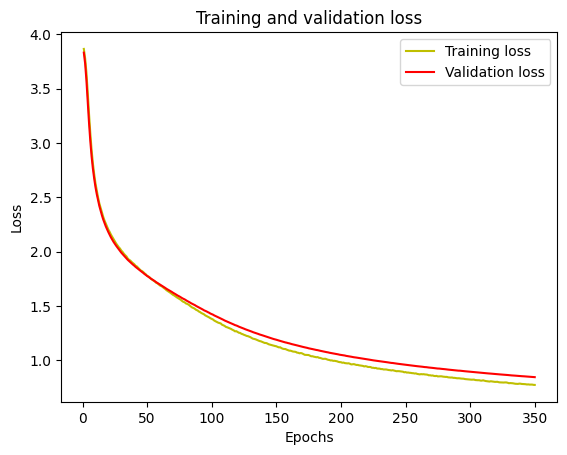

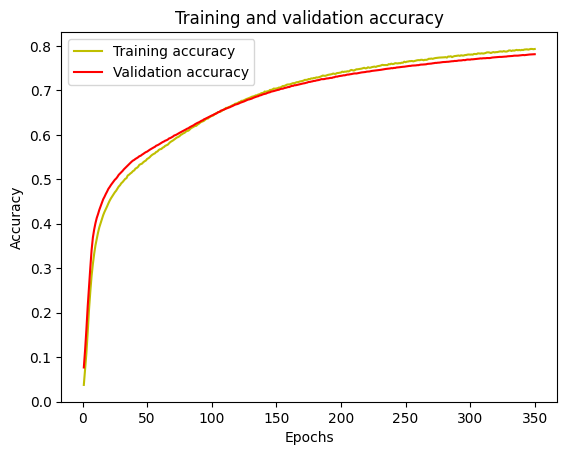

In [10]:
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()